In [14]:
!pip install pandas seaborn matplotlib scikit-learn wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl (167 kB)


In [15]:
import pandas as pd

df = pd.read_json("../data/emotion_dataset.json", orient="records", lines=True)

print(df.head())

# Labels:
# 0: anger
# 1: joy
# 2: fear
# 3: sadness


  Emotion  Score                                              Tweet
0   anger  0.562  @xandraaa5 @amayaallyn6 shut up hashtags are c...
1   anger  0.750  it makes me so fucking irate jesus. nobody is ...
2   anger  0.417         Lol Adam the Bull with his fake outrage...
3   anger  0.354  @THATSSHAWTYLO passed away early this morning ...
4   anger  0.438  @Kristiann1125 lol wow i was gonna say really?...


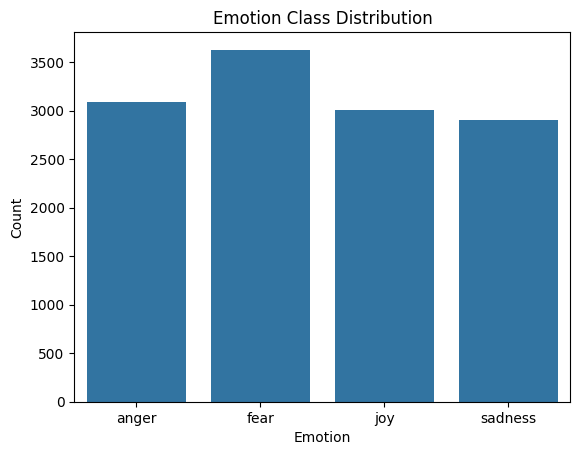

Emotion
fear       3627
anger      3091
joy        3011
sadness    2905
Name: count, dtype: int64


In [16]:
# Emotion Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Emotion', data=df)
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

print(df['Emotion'].value_counts()) 


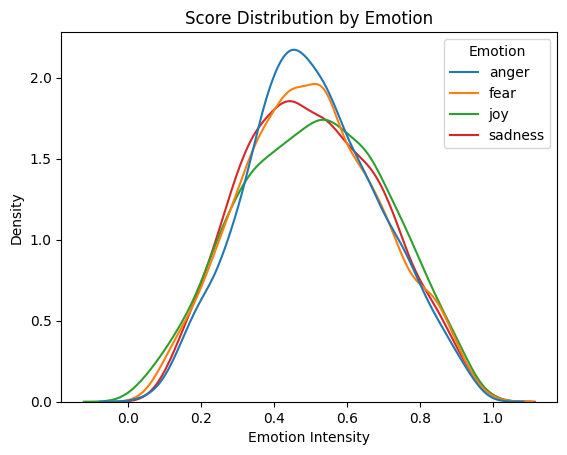

Emotion
joy        0.509170
anger      0.506087
sadness    0.504681
fear       0.502309
Name: Score, dtype: float64


In [17]:
sns.kdeplot(data=df, x="Score", hue="Emotion", common_norm=False)
plt.title("Score Distribution by Emotion")
plt.xlabel("Emotion Intensity")
plt.show()


mean_scores = df.groupby("Emotion")["Score"].mean().sort_values(ascending=False)
print(mean_scores)

In [18]:
# Shows the most used words in each of the classes
from sklearn.feature_extraction.text import CountVectorizer
sampled_df = df.sample(1000, random_state=42)

# Group by label and get common words
for emotion in sampled_df['Emotion'].unique():
    texts = sampled_df[sampled_df['Emotion'] == emotion]['Tweet']
    
    vec = CountVectorizer(stop_words='english', max_features=10)
    X = vec.fit_transform(texts)
    top_words = vec.get_feature_names_out()

    print(f"\nTop words for '{emotion}':")
    print(", ".join(top_words))


Top words for 'fear':
amp, anxiety, don, fear, just, know, like, people, start, today

Top words for 'joy':
amazing, day, good, happy, just, know, live, smile, watch, way

Top words for 'sadness':
dark, day, depression, don, feel, just, lost, sad, sadness, time

Top words for 'anger':
anger, don, just, know, like, mad, need, really, think, time


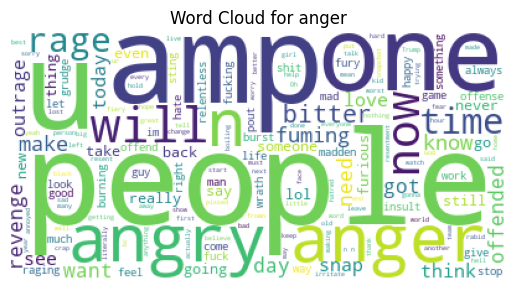

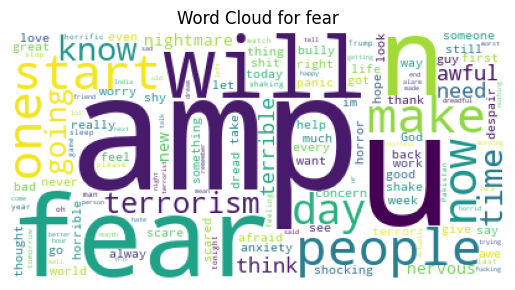

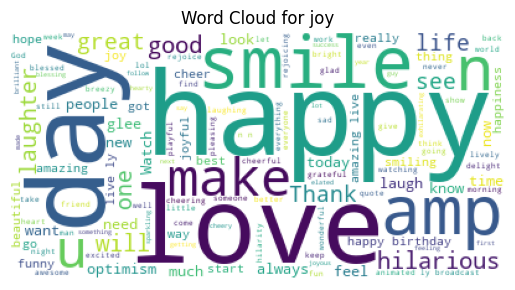

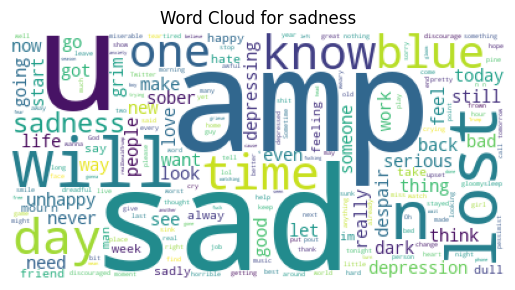

In [19]:
from wordcloud import WordCloud

for emotion in df['Emotion'].unique():
    text = ' '.join(df[df['Emotion'] == emotion]['Tweet'])
    wc = WordCloud(background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"Word Cloud for {emotion}")
    plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
sampled_df = df.sample(1000, random_state=42)

# Group by label and get common words
for emotion in sampled_df['Emotion'].unique():
    texts = sampled_df[sampled_df['Emotion'] == emotion]['Tweet']
    
    vec = CountVectorizer(stop_words='english', max_features=10)
    X = vec.fit_transform(texts)
    top_words = vec.get_feature_names_out()

    print(f"\nTop words for '{emotion}':")
    print(", ".join(top_words))


Top words for 'fear':
amp, anxiety, don, fear, just, know, like, people, start, today

Top words for 'joy':
amazing, day, good, happy, just, know, live, smile, watch, way

Top words for 'sadness':
dark, day, depression, don, feel, just, lost, sad, sadness, time

Top words for 'anger':
anger, don, just, know, like, mad, need, really, think, time


160 6


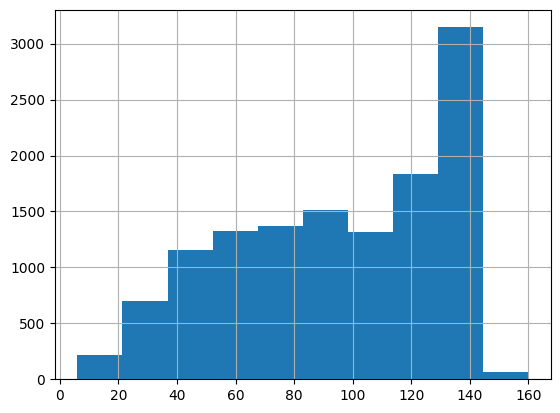

In [21]:
# Word lengths histogram:

df["Tweet"].str.len().hist()
print(max(df["Tweet"].str.len()), min(df["Tweet"].str.len()))

# String length range: 6 - 160

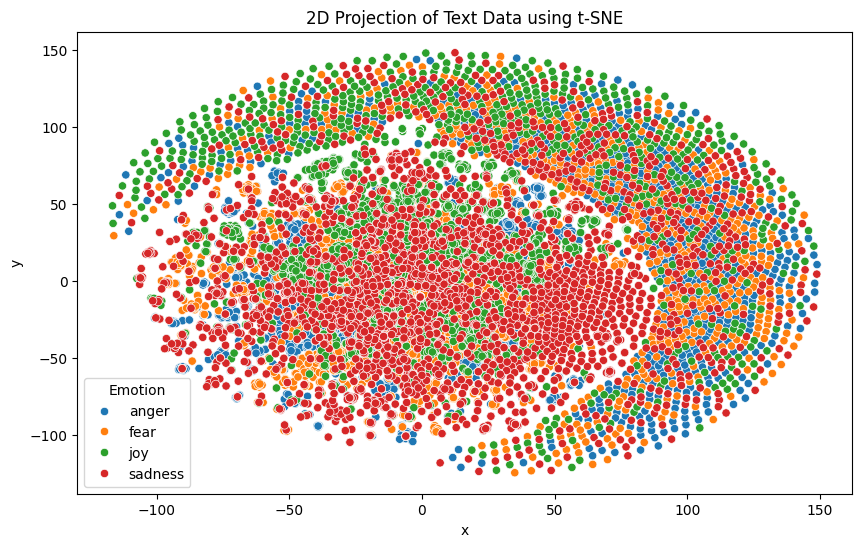

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Tweet'])

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_reduced = tsne.fit_transform(X.toarray())

# 3. Plot
reduced_df = pd.DataFrame(X_reduced, columns=['x', 'y'])
reduced_df['Emotion'] = df['Emotion'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='x', y='y', hue='Emotion', palette='tab10')
plt.title("2D Projection of Text Data using t-SNE")
plt.show()